In [ ]:
#importing libraries
from wordcloud import WordCloud
import pandas as pd
import re
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [5]:
#Reading the data set
import pandas as pd
train=pd.read_csv('Tweets-train.csv')
train.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
1,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
2,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
3,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
4,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [17]:
train.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.064000e+04,10640,10640.000000,6670,7672.000000,10640,31,10640,26,10640.000000,10640,760,10640,7184,7136
unique,NaN,3,NaN,10,NaN,6,3,6328,11,NaN,10531,635,10446,2594,80
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Washington, DC",Eastern Time (US & Canada)
freq,NaN,6670,NaN,2129,NaN,2751,26,48,11,NaN,5,115,3,119,2742
mean,5.692175e+17,NaN,0.899437,NaN,0.632732,NaN,NaN,NaN,NaN,0.077632,NaN,NaN,NaN,NaN,NaN
std,7.788568e+14,NaN,0.163237,NaN,0.331262,NaN,NaN,NaN,NaN,0.638540,NaN,NaN,NaN,NaN,NaN
min,5.675900e+17,NaN,0.335300,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685560e+17,NaN,0.691500,NaN,0.359275,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694750e+17,NaN,1.000000,NaN,0.670100,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698914e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [18]:
#null values
train.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   3970
negativereason_confidence        2968
airline                             0
airline_sentiment_gold          10609
name                                0
negativereason_gold             10614
retweet_count                       0
text                                0
tweet_coord                      9880
tweet_created                       0
tweet_location                   3456
user_timezone                    3504
dtype: int64

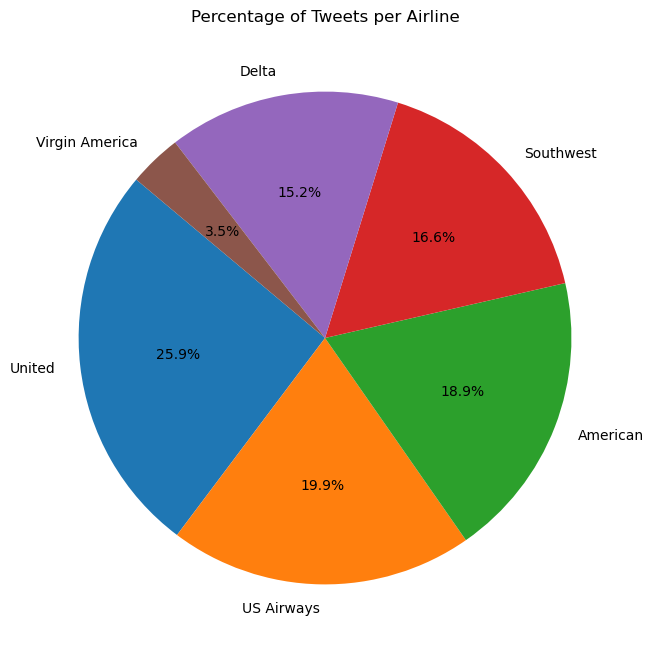

In [19]:
# Calculating airline percentages using pie chart
airline_counts = train['airline'].value_counts()
airline_percentages = (airline_counts / airline_counts.sum()) * 100

# Plotting the airline percentages as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(airline_percentages, labels=airline_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Tweets per Airline")
plt.show()

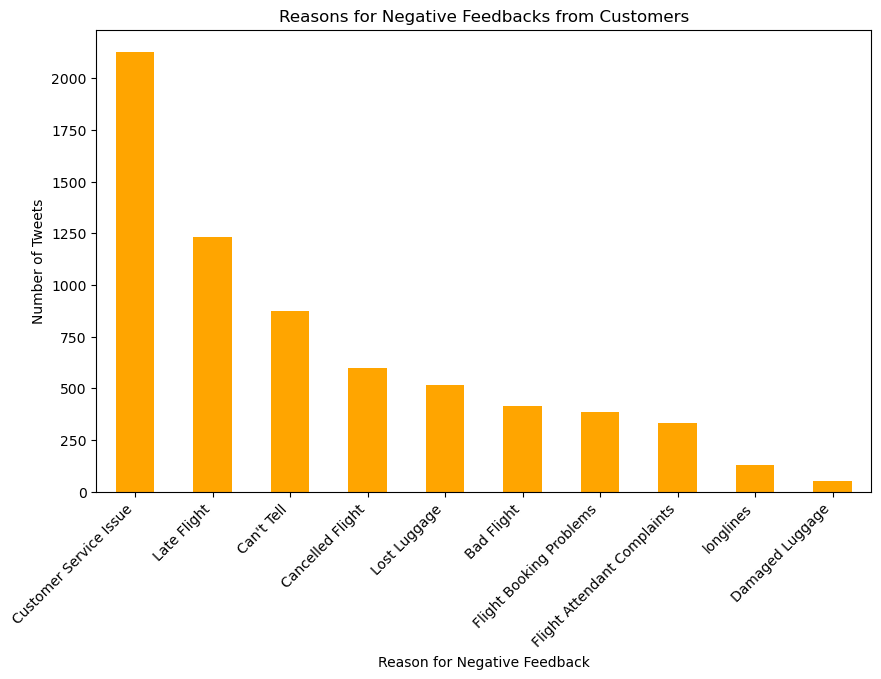

In [20]:
# Using bar graph, counting the reasons for negative feedbacks about airlines
negative_reasons = train['negativereason'].value_counts()

# Plotting the reasons for negative feedbacks
plt.figure(figsize=(10, 6))
negative_reasons.plot(kind='bar', color='orange')
plt.title("Reasons for Negative Feedbacks from Customers")
plt.xlabel("Reason for Negative Feedback")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
#Selecting only sentiment and tweet column from the entire data set
train=train[['airline_sentiment','text']]
train

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,neutral,@VirginAmerica I didn't today... Must mean I n...
2,negative,@VirginAmerica it's really aggressive to blast...
3,negative,@VirginAmerica and it's a really big bad thing...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
10635,positive,@AmericanAir Thanks! He is.
10636,neutral,"“@AmericanAir: @TilleyMonsta George, that does..."
10637,neutral,@AmericanAir Please bring American Airlines to...
10638,negative,"@AmericanAir you have my money, you change my ..."


In [9]:
#printing 10 random positive sentiments
for each in train[train['airline_sentiment']=="positive"].sample(10,random_state=10)['text']:
    print (each)

@USAirways it was customer service like I have never seen before!  Kudos to your organization.
@AmericanAir I love your company and your staff is amazing. They just made an uncomfortable situation comfortable
@united I appreciate the follow up.
@JetBlue boarding the back of the airplane first. Like a boss. #sosmart #jetblue #frequentflyerappreciates #alsoyayforsnacks
@AmericanAir mission accomplished today, Thank you!
@united thnx
@united thank you for following up!
@JetBlue thanks so much!! ❤️✨ very relaxing flight!
@USAirways thanks for seating me next to 2 hot athletes. This flight is significantly better now!
@united awesome new plane flight 1701


In [11]:
#printing some negative sentiments
for each in train[train['airline_sentiment']=="negative"].sample(10,random_state=10)['text']:
    print (each)

@AmericanAir continues to win: I've never missed a flight before, but a nice little quiet gate change made it possible. Sheesh.
@united is that all that matters, not the fact that we're at a different destination, we were put through a tremendous amount of stress,
@USAirways your lack of customer service has shined. I need you to step up and get my lost baggage to delta. So they can return it to me.
@united Terribly disappointed. Confirmed reservation delayed and your cust. service staff was not helpful in finding an alternate solution.
@united what is this subtlety gate changes? Are you kidding with me?
@SouthwestAir and now no wifi??? Come on.
@JetBlue is flight 51 on 4/24/15 moved back? When I booked it said we arrive 11:31 but now it says 12:08 😢
@AmericanAir complt incompetence on flt 295.Lav delay from a pln that lnded last nite, no internet and poor svc. Not what I expect from u.
@united @annricord 0162431184663.
3 of your agents said we would be refunded. Agents said United sho

In [13]:
#printing 10 random neutral sentiments
for each in train[train['airline_sentiment']=="neutral"].sample(10,random_state=10)['text']:
    print (each) 

@JetBlue you guys get rid of the hip hop stations on Sirius XM?
@JetBlue deal!
@united can I request a ticket change through twitter ?
@united My mom left her Kindle on flight 1544 today. Burgundy case with a light. Seat 27D. Did anyone find it?
@USAirways am 2. 1/2 hours from airport sure would like to talk to someone
@JetBlue well I'm not sure I'm that bold! lol or are you saying you didn't believe me?? :P
@united can you send me another confirmation email?
@SouthwestAir first time flyer, scheduled a (round)trip. set on departure date not sure on returning date, policy/fees on changing Re Flight
@SouthwestAir still haven't been able to get through, thanks for responding
@USAirways we even offered to fly in to another airport and they said they couldn't do that. No explanation why they can't.


In [60]:
# cleaning the data to remove @ mentions
import re

print (train.text[5])
print (re.sub(r'@+','',train.text[5]))

@virginamerica Well, I didn't…but NOW I DO! :-D
virginamerica Well, I didn't…but NOW I DO! :-D


In [61]:
# cleaning and removing Links 

print (train.text[10])
print (re.sub('http?://[A-Za-z0-9./]+','',train.text[10]))


@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn
@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel 


In [62]:
# selects only aplhabets numbers so that punctuations and emojis are removed.
print (train.text[22]) 
print (re.sub("[^a-zA-Z0-9]", " ",train.text[22]))
print (train.text[5977])
print (re.sub("[^a-zA-Z0-9]", " ",train.text[5977]))

@VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worstflightever #roasted #SFOtoBOS
 VirginAmerica amazing to me that we can t get any cold air from the vents   VX358  noair  worstflightever  roasted  SFOtoBOS
@JetBlue thanks so much!! ❤️✨ very relaxing flight!
 JetBlue thanks so much       very relaxing flight 


In [19]:
#using a nltk function to clean all the above observed tokens from the tweet text.
from nltk.tokenize import WordPunctTokenizer
import re
tokenizer = WordPunctTokenizer()
def tweet_cleaner(text):
    text=re.sub(r'@+','',text)
    text=re.sub('http?://[A-Za-z0-9./]+','',text)
    text=re.sub("[^a-zA-Z]", " ",text)
    lower_case = text.lower()
    words = tokenizer.tokenize(lower_case)
    return (" ".join(words)).strip()

In [21]:
#train['Cleaned-Text']=map(lambda x:tweet_cleaner(x),train['text'])
train['Cleaned-Text'] = list(map(lambda x: tweet_cleaner(x), train['text']))

In [25]:
train.head(4)

,airline_sentiment,text,Cleaned-Text
0,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus you ve added commercials to...
1,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i didn t today must mean i need ...
2,negative,@VirginAmerica it's really aggressive to blast...,virginamerica it s really aggressive to blast ...
3,negative,@VirginAmerica and it's a really big bad thing...,virginamerica and it s a really big bad thing ...


In [27]:
#printingsome words in All sentiments
from collections import Counter
for group_name,subset in train.groupby('airline_sentiment'):
    sentimentData=subset['Cleaned-Text']
    words=[]
    for each in sentimentData:
        words.extend(each.split(" "))
    print (group_name)
    print (Counter(words).most_common(15))
    

negative
[('to', 4326), ('i', 3313), ('the', 3021), ('a', 2344), ('flight', 2113), ('united', 2101), ('and', 2049), ('on', 2023), ('for', 1999), ('you', 1959), ('my', 1726), ('usairways', 1722), ('americanair', 1549), ('is', 1526), ('t', 1327)]
neutral
[('to', 1185), ('i', 1004), ('the', 730), ('a', 616), ('you', 561), ('jetblue', 540), ('united', 530), ('southwestair', 489), ('on', 479), ('for', 443), ('flight', 436), ('my', 391), ('is', 372), ('americanair', 363), ('in', 355)]
positive
[('the', 690), ('to', 675), ('you', 672), ('i', 555), ('for', 493), ('thanks', 448), ('jetblue', 443), ('southwestair', 424), ('a', 385), ('united', 376), ('thank', 336), ('and', 306), ('flight', 269), ('my', 263), ('americanair', 254)]


In [47]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def RemoveStopWords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUP162\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
train['Clean-Text-StopWords-Removed'] = list(map(lambda x: RemoveStopWords(x), train['Cleaned-Text']))
print(train['Clean-Text-StopWords-Removed'])

0        virginamerica plus added commercials experienc...
1        virginamerica today must mean need take anothe...
2        virginamerica really aggressive blast obnoxiou...
3                       virginamerica really big bad thing
4        virginamerica yes nearly every time fly vx ear...
                               ...                        
10635                                   americanair thanks
10636    americanair tilleymonsta george look good plea...
10637    americanair please bring american airlines bla...
10638    americanair money change flight answer phones ...
10639    americanair ppl need know many seats next flig...
Name: Clean-Text-StopWords-Removed, Length: 10640, dtype: object


In [33]:
#Again let's see the counts of most common words after removing stopwords.
from collections import Counter
for group_name,subset in train.groupby('airline_sentiment'):
    sentimentData=subset['Clean-Text-StopWords-Removed']
    words=[]
    for each in sentimentData:
        words.extend(each.split(" "))
    print (group_name)
    print (Counter(words).most_common(15))

negative
[('flight', 2113), ('united', 2101), ('usairways', 1722), ('americanair', 1549), ('southwestair', 884), ('jetblue', 755), ('get', 728), ('cancelled', 648), ('service', 530), ('hours', 502), ('help', 443), ('customer', 428), ('time', 426), ('hold', 424), ('plane', 387)]
neutral
[('jetblue', 540), ('united', 530), ('southwestair', 489), ('flight', 436), ('americanair', 363), ('usairways', 302), ('get', 173), ('please', 132), ('virginamerica', 130), ('flights', 130), ('help', 121), ('thanks', 115), ('need', 114), ('would', 92), ('dm', 91)]
positive
[('thanks', 448), ('jetblue', 443), ('southwestair', 424), ('united', 376), ('thank', 336), ('flight', 269), ('americanair', 254), ('usairways', 199), ('great', 165), ('service', 120), ('virginamerica', 114), ('love', 105), ('best', 85), ('customer', 85), ('good', 82)]


In [35]:
#removing the most common stopwords i.e americanair, united, delta
def RemoveExplicitlyMentionedWords(string,listofWordsToRemove):
    listOfAllWords=string.split(" ")
    listOfWords= [x for x in listOfAllWords if x not in listofWordsToRemove]
    return (" ".join(listOfWords)).strip()    

In [39]:
list_of_words_to_remove=['americanair','united','delta','southwestair','jetblue','virginamerica','usairways','flight','plane']
train['Final-Wrangled-Text'] = list(map(lambda x:RemoveExplicitlyMentionedWords(x,list_of_words_to_remove),train['Clean-Text-StopWords-Removed']))
print(train['Final-Wrangled-Text'])

0                  plus added commercials experience tacky
1                   today must mean need take another trip
2        really aggressive blast obnoxious entertainmen...
3                                     really big bad thing
4            yes nearly every time fly vx ear worm go away
                               ...                        
10635                                               thanks
10636    tilleymonsta george look good please follow li...
10637            please bring american airlines blackberry
10638    money change answer phones suggestions make co...
10639    ppl need know many seats next plz put us stand...
Name: Final-Wrangled-Text, Length: 10640, dtype: object


In [51]:
#printing Again words in All sentiments
from collections import Counter
for group_name,subset in train.groupby('airline_sentiment'):
    sentimentData=subset['Final-Wrangled-Text']
    words=[]
    for each in sentimentData:
        words.extend(each.split(" "))
    print (group_name)
    print (Counter(words).most_common(15))

negative
[('get', 728), ('cancelled', 648), ('service', 530), ('hours', 502), ('help', 443), ('customer', 428), ('time', 426), ('hold', 424), ('delayed', 371), ('amp', 368), ('us', 364), ('still', 363), ('call', 334), ('hour', 324), ('one', 322)]
neutral
[('get', 173), ('please', 132), ('flights', 130), ('help', 121), ('thanks', 115), ('need', 114), ('would', 92), ('dm', 91), ('time', 80), ('tomorrow', 76), ('cancelled', 74), ('amp', 73), ('know', 72), ('us', 72), ('fleek', 70)]
positive
[('thanks', 448), ('thank', 336), ('great', 165), ('service', 120), ('love', 105), ('best', 85), ('customer', 85), ('good', 82), ('guys', 81), ('much', 77), ('get', 76), ('awesome', 71), ('got', 71), ('help', 65), ('time', 64)]


In [53]:
#encoding sentiments 
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
train['SentimentLabel']=l.fit_transform(train['airline_sentiment'])
train.head(4)

,airline_sentiment,text,Cleaned-Text,Clean-Text-StopWords-Removed,Final-Wrangled-Text,SentimentLabel
0,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus you ve added commercials to...,virginamerica plus added commercials experienc...,plus added commercials experience tacky,2
1,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i didn t today must mean i need ...,virginamerica today must mean need take anothe...,today must mean need take another trip,1
2,negative,@VirginAmerica it's really aggressive to blast...,virginamerica it s really aggressive to blast ...,virginamerica really aggressive blast obnoxiou...,really aggressive blast obnoxious entertainmen...,0
3,negative,@VirginAmerica and it's a really big bad thing...,virginamerica and it s a really big bad thing ...,virginamerica really big bad thing,really big bad thing,0


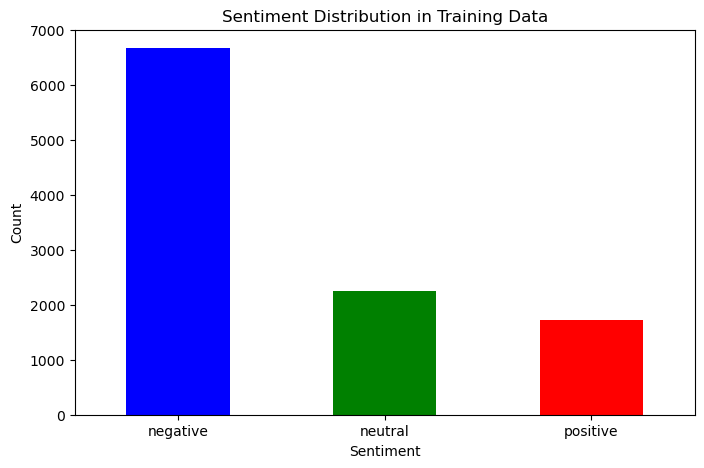

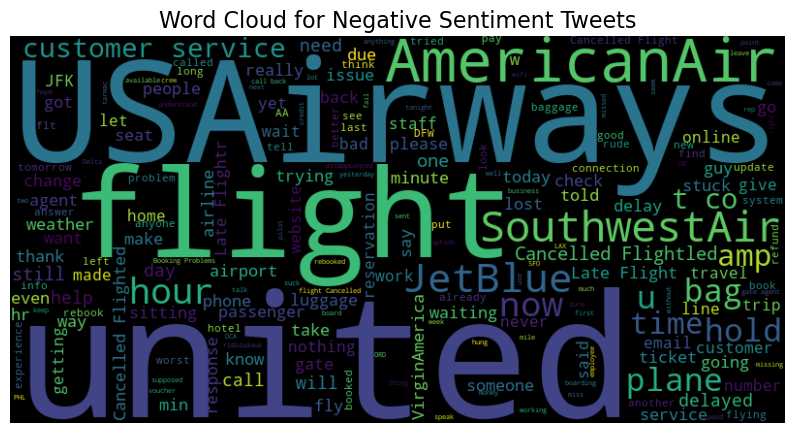

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sentiment distribution in the training data
sentiment_counts = train['airline_sentiment'].value_counts()

# Plotting sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Word Cloud for negative sentiment tweets
negative_tweets = " ".join(train[train['airline_sentiment'] == 'negative']['text'].astype(str))

wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Tweets', fontsize=16)
plt.show()

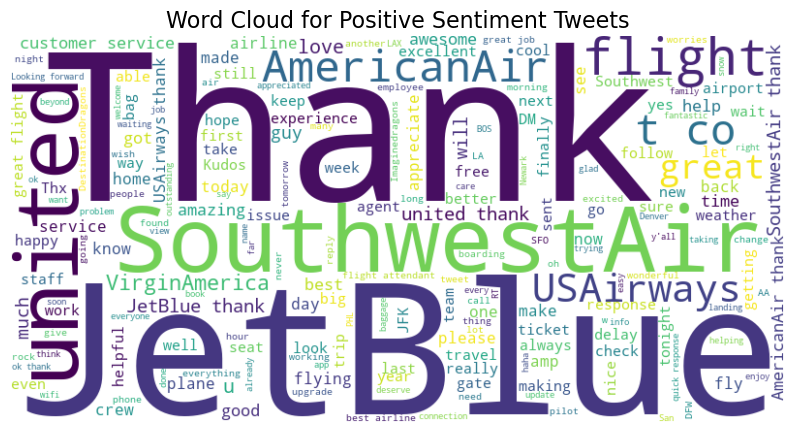

In [23]:
# Word Cloud for positive sentiment tweets
positive_tweets = " ".join(train[train['airline_sentiment'] == 'positive']['text'].astype(str))

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_tweets)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment Tweets', fontsize=16)
plt.show()

In [55]:
#vectorizing the text column 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [57]:
x_train=vectorizer.fit_transform(train['Final-Wrangled-Text'])

In [59]:
#Prepare a multiclass Classification model using any classification algorithm and create a model 
y_train=train['SentimentLabel']

In [61]:
#Preparing Model Using Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [77]:
#Read the test data and carry our data cleaning, encoding and vectorising operations on the test data
test=pd.read_csv('Tweets-test.csv')
test=test[['airline_sentiment','text']]
test['Cleaned-Text'] = list(map(lambda x:tweet_cleaner(x),test['text']))
test['Clean-Text-StopWords-Removed'] = list(map(lambda x:RemoveStopWords(x),test['Cleaned-Text']))
test['Final-Wrangled-Text'] = list(map(lambda x:RemoveExplicitlyMentionedWords(x,list_of_words_to_remove),test['Clean-Text-StopWords-Removed']))
x_test=vectorizer.transform(test['Final-Wrangled-Text'])


In [73]:
#Encoding label for test data as well
test['SentimentLabel']=l.transform(test['airline_sentiment'])
y_test=test['SentimentLabel']
y_test

0       0
1       0
2       0
3       2
4       1
       ..
3995    0
3996    1
3997    0
3998    0
3999    0
Name: SentimentLabel, Length: 4000, dtype: int32

In [88]:
#Predict the sentiments for test data
y_pred=nb.predict(x_test)

In [ ]:
def GetOrignalSentiment(val):
    if val==0:
        return 'negative'
    elif val==1:
        return 'neutral'
    else:
        return 'positive'
    
Result=test[['text','airline_sentiment']]
Result['Predicted_sentiment'] = list(map(lambda x:GetOrignalSentiment(x),y_pred))

In [ ]:
Result.head(3)

In [ ]:
#Predict the sentiments for test data
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix 
cm = confusion_matrix(Result['airline_sentiment'], Result['Predicted_sentiment'], labels=['negative', 'neutral', 'positive'])

cm

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [96]:
#Explaning Confusion Matrix Elements
for i,x in Result.groupby(['airline_sentiment','Predicted_sentiment']):
    print ("Actual "+ i[0]+ " Predicted "+i[1]+ ":", len(x))

Actual negative Predicted negative: 2396
Actual negative Predicted neutral: 79
Actual negative Predicted positive: 33
Actual neutral Predicted negative: 456
Actual neutral Predicted neutral: 333
Actual neutral Predicted positive: 62
Actual positive Predicted negative: 225
Actual positive Predicted neutral: 51
Actual positive Predicted positive: 365


In [98]:
#Accuracy :
ActualNegativePrdictedNegative=2396
ActualNeutralPrdictedNeutral=333
ActualPositivePrdictedPositive=365
TotalCorrect=ActualNegativePrdictedNegative+ActualNeutralPrdictedNeutral+ActualPositivePrdictedPositive
print ("Accuracy=",TotalCorrect*100.0/len(test) ,"%")

Accuracy= 77.35 %
